In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
from pathlib import Path

data_dir = r"C:\Mahindra University\Sem 4\Projects\P3\data"
train1_path = Path(data_dir) / "train_FD001.txt"
df = pd.read_csv(train1_path, delimiter=" ", header=None)
df.columns = (
    ["E_no", "cycles", "Op 1", "Op 2", "Op 3"] +
    [f"Sensor {i}" for i in range(23)] #23 sensors
)

pd.set_option('display.max_columns', None)
df.head()

,E_no,cycles,Op 1,Op 2,Op 3,Sensor 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20,Sensor 21,Sensor 22
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [31]:
df_clean = df.drop(
    ["Op 1", "Op 2", "Op 3","E_no"] +
    [f"Sensor {i}" for i in [21,22]],
    axis=1,
    inplace=False
)
train_df.head()

,cycles,Sensor 0,Sensor 1,Sensor 2,Sensor 3,Sensor 4,Sensor 5,Sensor 6,Sensor 7,Sensor 8,Sensor 9,Sensor 10,Sensor 11,Sensor 12,Sensor 13,Sensor 14,Sensor 15,Sensor 16,Sensor 17,Sensor 18,Sensor 19,Sensor 20
0,1,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,2,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,3,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,4,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,5,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [32]:
from sklearn.preprocessing import StandardScaler

X = df_clean.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [33]:
from sklearn.cluster import KMeans

pca = PCA(n_components=1)
scores = pca.fit_transform(X_scaled).flatten()

kmeans = KMeans(n_clusters=5, random_state=42)
stage_labels = kmeans.fit_predict(scores.reshape(-1, 1))

unique, counts = np.unique(stage_labels, return_counts=True)
sorted_clusters = [x for _, x in sorted(zip(counts, unique))]
cluster_to_stage = {cid: i for i, cid in enumerate(sorted_clusters[::-1])}
y = np.array([cluster_to_stage[c] for c in stage_labels])


In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)


In [35]:
# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced', random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0      0.905     0.926     0.915      1169
           1      0.892     0.938     0.914      1075
           2      0.975     0.928     0.951       901
           3      0.930     0.886     0.908       588
           4      0.971     0.947     0.959       394

    accuracy                          0.926      4127
   macro avg      0.935     0.925     0.929      4127
weighted avg      0.927     0.926     0.926      4127



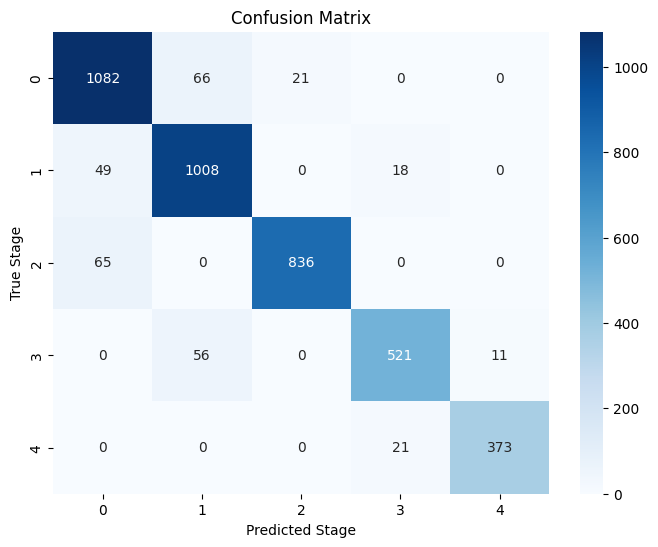

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, digits=3))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix")
plt.show()


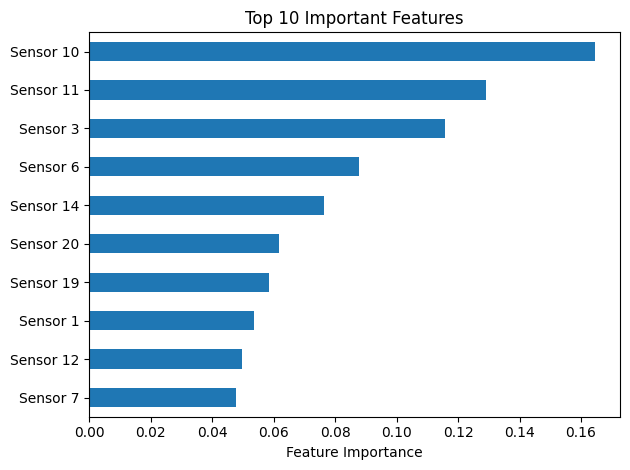

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

feature_names = df_clean.columns

feat_importances = pd.Series(clf.feature_importances_, index=feature_names)

# Plot the top 10
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [39]:
# Logistic

In [40]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(
    solver='lbfgs',
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

log_reg.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0      0.996     0.988     0.992      1169
           1      0.989     0.984     0.986      1075
           2      0.998     0.996     0.997       901
           3      0.973     0.993     0.983       588
           4      0.990     1.000     0.995       394

    accuracy                          0.991      4127
   macro avg      0.989     0.992     0.991      4127
weighted avg      0.991     0.991     0.991      4127



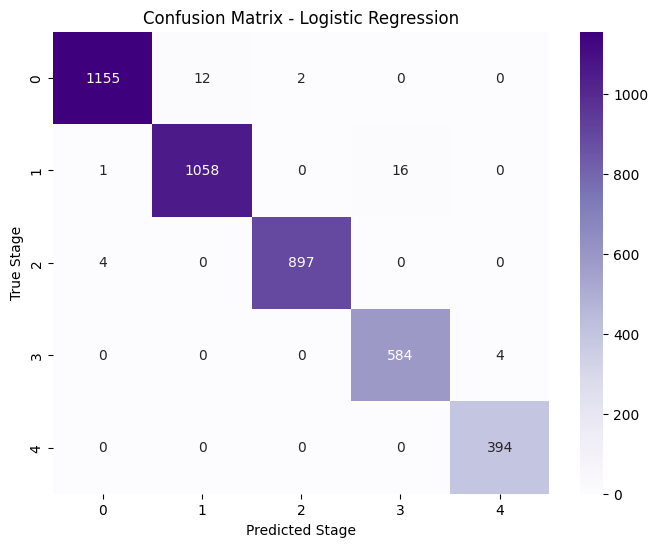

In [41]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_lr = log_reg.predict(X_test)

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, digits=3))

# Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Purples', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [42]:
# SVM

In [43]:
from sklearn.svm import SVC

svm_clf = SVC(
    kernel='rbf',          
    class_weight='balanced',
    probability=True,      
)

svm_clf.fit(X_train, y_train)


SVC(class_weight='balanced', probability=True)

SVM Classification Report:
              precision    recall  f1-score   support

           0      0.996     0.973     0.984      1169
           1      0.985     0.978     0.981      1075
           2      0.984     0.997     0.990       901
           3      0.962     0.991     0.977       588
           4      0.987     0.997     0.992       394

    accuracy                          0.984      4127
   macro avg      0.983     0.987     0.985      4127
weighted avg      0.985     0.984     0.984      4127



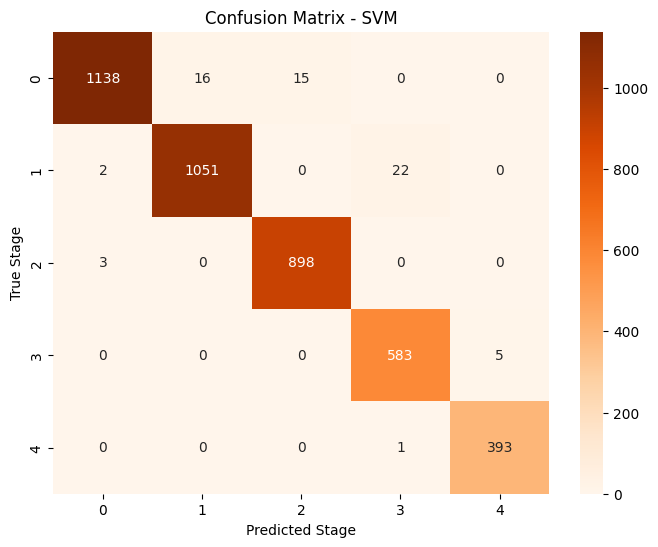

In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_svm = svm_clf.predict(X_test)

print("SVM Classification Report:")
print(classification_report(y_test, y_pred_svm, digits=3))

# Confusion Matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Oranges', xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Stage")
plt.ylabel("True Stage")
plt.title("Confusion Matrix - SVM")
plt.show()
